In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
# 对偶函数可行解，由v计算x
def back(v):
    x = np.zeros(100)
    for i in range(100):
        x[i] = np.exp(-np.dot(v, A[:, i]) - 1)
    return x


# 代入可行解，求得对偶函数
def f(v, b, A):
    result = -np.dot(b, v)
    for i in range(100):
        result = result - np.exp(-np.dot(v, A[:, i])-1)
    return -result


# 计算梯度
def grad(v, b, A):
    result = np.zeros(30)
    for i in range(30):
        s = 0
        for k in range(100):
            s = s + A[i][k]*np.exp(-np.dot(v, A[:, k])-1)
        result[i] = -b[i] + s
    return -result


# 计算Hessian矩阵
def hessian(v, A):
    result = np.zeros((30, 30))
    for i in range(30):
        for j in range(30):
            h = 0
            for k in range(100):
                h = h + A[i][k]*A[j][k]*np.exp(-np.dot(v, A[:, k])-1)
            result[i][j] = -h
    return -result





In [2]:
#牛顿方向
dnt=lambda hessian,grad:-np.dot(np.linalg.inv(hessian),grad)
# 牛顿减少量
lambda_2=lambda dk,hessian:np.dot(np.dot(dk,hessian),dk.T)

## 牛顿法 (Newton Method)
* given a start point $x \in dom L$
* repeat
    * compute gradient $\nabla L(x)$
    * compute newton direction $\Delta x_{nt}=-\nabla^2 L(x)^{-1}\nabla L(x)$
    * compute newton decrement $\lambda (x)=(\Delta x_{nt}^T\nabla^2 L(x) \Delta x_{nt})^{1/2}$
    * line search: choose learning rate $t$
    * update: $x:=x+t\Delta x_{nt}$
    
## 回溯直线搜索(line search)
* initialize $\alpha \in (0,0.5] $,$\beta \in [0,1]$,$t=1$
* while $L(x+t\Delta x_{sd})>L(x)+\alpha t\nabla L(x)^T\Delta x_{sd}$
    * $t:=\beta t$
* end

第0轮:loss=-156.10648835869313
第1轮:loss=-118.13581097077937
第2轮:loss=-57.94775939186362
第3轮:loss=-39.52813669621822
第4轮:loss=-34.06792473493707
第5轮:loss=-32.87195746922535
第6轮:loss=-32.7833023058429
第7轮:loss=-32.78269292711094
最优值:x=[0.61240132 0.5149147  0.60478261 0.68467012 0.65637014 0.46460761
 0.55790405 0.51210362 0.41623328 0.82888925 0.34576797 0.48288991
 0.30172109 0.39117254 0.29953613 0.41954109 0.6530249  0.60804934
 0.40469509 0.52827795 0.77095639 0.62488936 0.54991489 0.38838572
 1.08907978 0.41769904 0.4056318  0.48302407 0.75967002 0.4091075
 0.49851168 0.63867099 0.36740862 0.41175234 0.47032237 0.30919096
 0.60444848 0.42247143 0.44322015 0.47864496 0.36577649 0.38463484
 0.47889732 0.57331565 0.4679424  0.90465925 0.40695724 0.40546196
 0.75938206 0.49866763 0.36734444 0.3583664  0.5426326  0.49064586
 0.4481237  0.34757991 0.5333863  0.65137441 0.42117122 0.37181017
 0.42410897 0.46093533 0.60132985 0.39720543 0.543493   0.61850285
 0.73593926 0.43983627 0.63974375

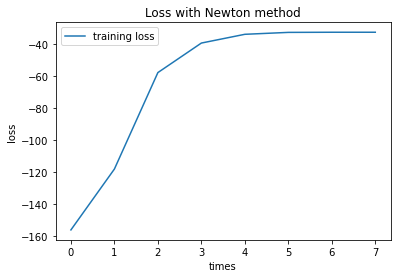

In [4]:
import time
if __name__ == '__main__':
    A = np.loadtxt('A.txt')
    b = np.loadtxt('b.txt')
    # 1.给定初始v和误差值
    v = np.ones(30)*0.2
    e = 1e-16

    # 2.确定牛顿方向和牛顿减少量
    hessian_v = hessian(v, A)
    grad_v = grad(v, b, A)
    dk = dnt(hessian_v, grad_v)
    lambda_k2 = lambda_2(dk, hessian_v)
    
    step=0
    Loss_1=[]
    # 3.判断是否停止
    start_time=time.time()
    while lambda_k2/2 > e:
        #
        loss = -f(v,b,A)
        Loss_1.append(loss)
        print("第{}轮:loss={}".format(step,loss))
        step+=1
        # 4.回溯直线搜索
        alpha = 0.2
        beta = 0.5
        t = 1
        while f(v+t*dk, b, A) > f(v, b, A)-alpha*t*lambda_k2:
            t = beta*t
        # 5. 更新
        v = v + t*dk
        hessian_v = hessian(v, A)
        grad_v = grad(v, b, A)
        dk = dnt(hessian_v, grad_v)
        lambda_k2 = lambda_2(dk, hessian_v)
    x = back(v)
    print("最优值:x={}".format(x))
    print("最优解:".format(-f(v, b, A)))
    print("计算时间:{}sec".format(time.time()-start_time))
    
    plt.plot(Loss_1,label='training loss')
    plt.title('Loss with Newton method')
    plt.xlabel('times')
    plt.ylabel('loss')
    plt.legend()

> 在numpy使用中尽量少用for循环，多用矩阵运算，这个比第一种方法慢好多
> 不过也有可能很大原因时间用在Hessian矩阵上的，这个比前一个的Hessian复杂好多